In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from scipy import stats

In [56]:
df=pd.read_csv("creditcard.csv")

In [57]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [58]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [60]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [61]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [62]:
df.shape

(284807, 31)

In [63]:
df.kurt()

Time       -1.293530
V1         32.486679
V2         95.773106
V3         26.619551
V4          2.635455
V5        206.904560
V6         42.642494
V7        405.607417
V8        220.586974
V9          3.731311
V10        31.988239
V11         1.633921
V12        20.241870
V13         0.195300
V14        23.879462
V15         0.284769
V16        10.419131
V17        94.799719
V18         2.578341
V19         1.724970
V20       271.016113
V21       207.287040
V22         2.832967
V23       440.088659
V24         0.618871
V25         4.290412
V26         0.919006
V27       244.989241
V28       933.397502
Amount    845.092646
Class     573.887843
dtype: float64

In [64]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x285036f9c30>,
 'caps': [<matplotlib.lines.Line2D at 0x285036fa170>,
 'boxes': [<matplotlib.lines.Line2D at 0x285036f99f0>],
 'medians': [<matplotlib.lines.Line2D at 0x285036fa6b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x285036fa950>],
 'means': []}

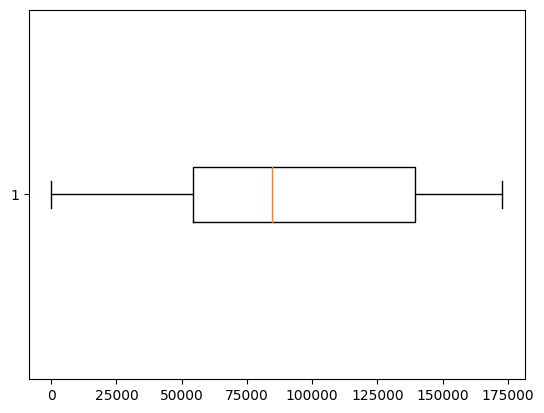

In [65]:
plt.boxplot(df['Time'] , vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2850b7d9de0>,
 'caps': [<matplotlib.lines.Line2D at 0x2850b7da320>,
 'boxes': [<matplotlib.lines.Line2D at 0x2850b7d9b40>],
 'medians': [<matplotlib.lines.Line2D at 0x2850b7da860>],
 'fliers': [<matplotlib.lines.Line2D at 0x2850b7dab00>],
 'means': []}

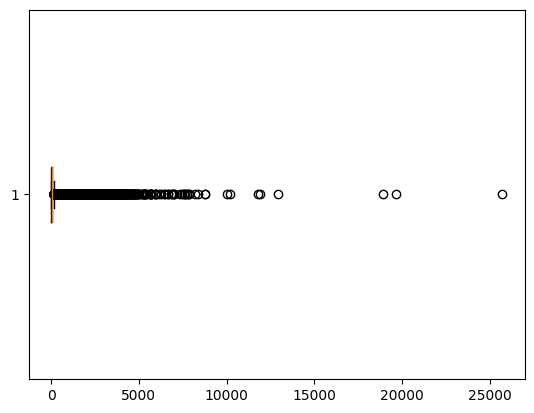

In [66]:
plt.boxplot(df['Amount'] , vert=False)

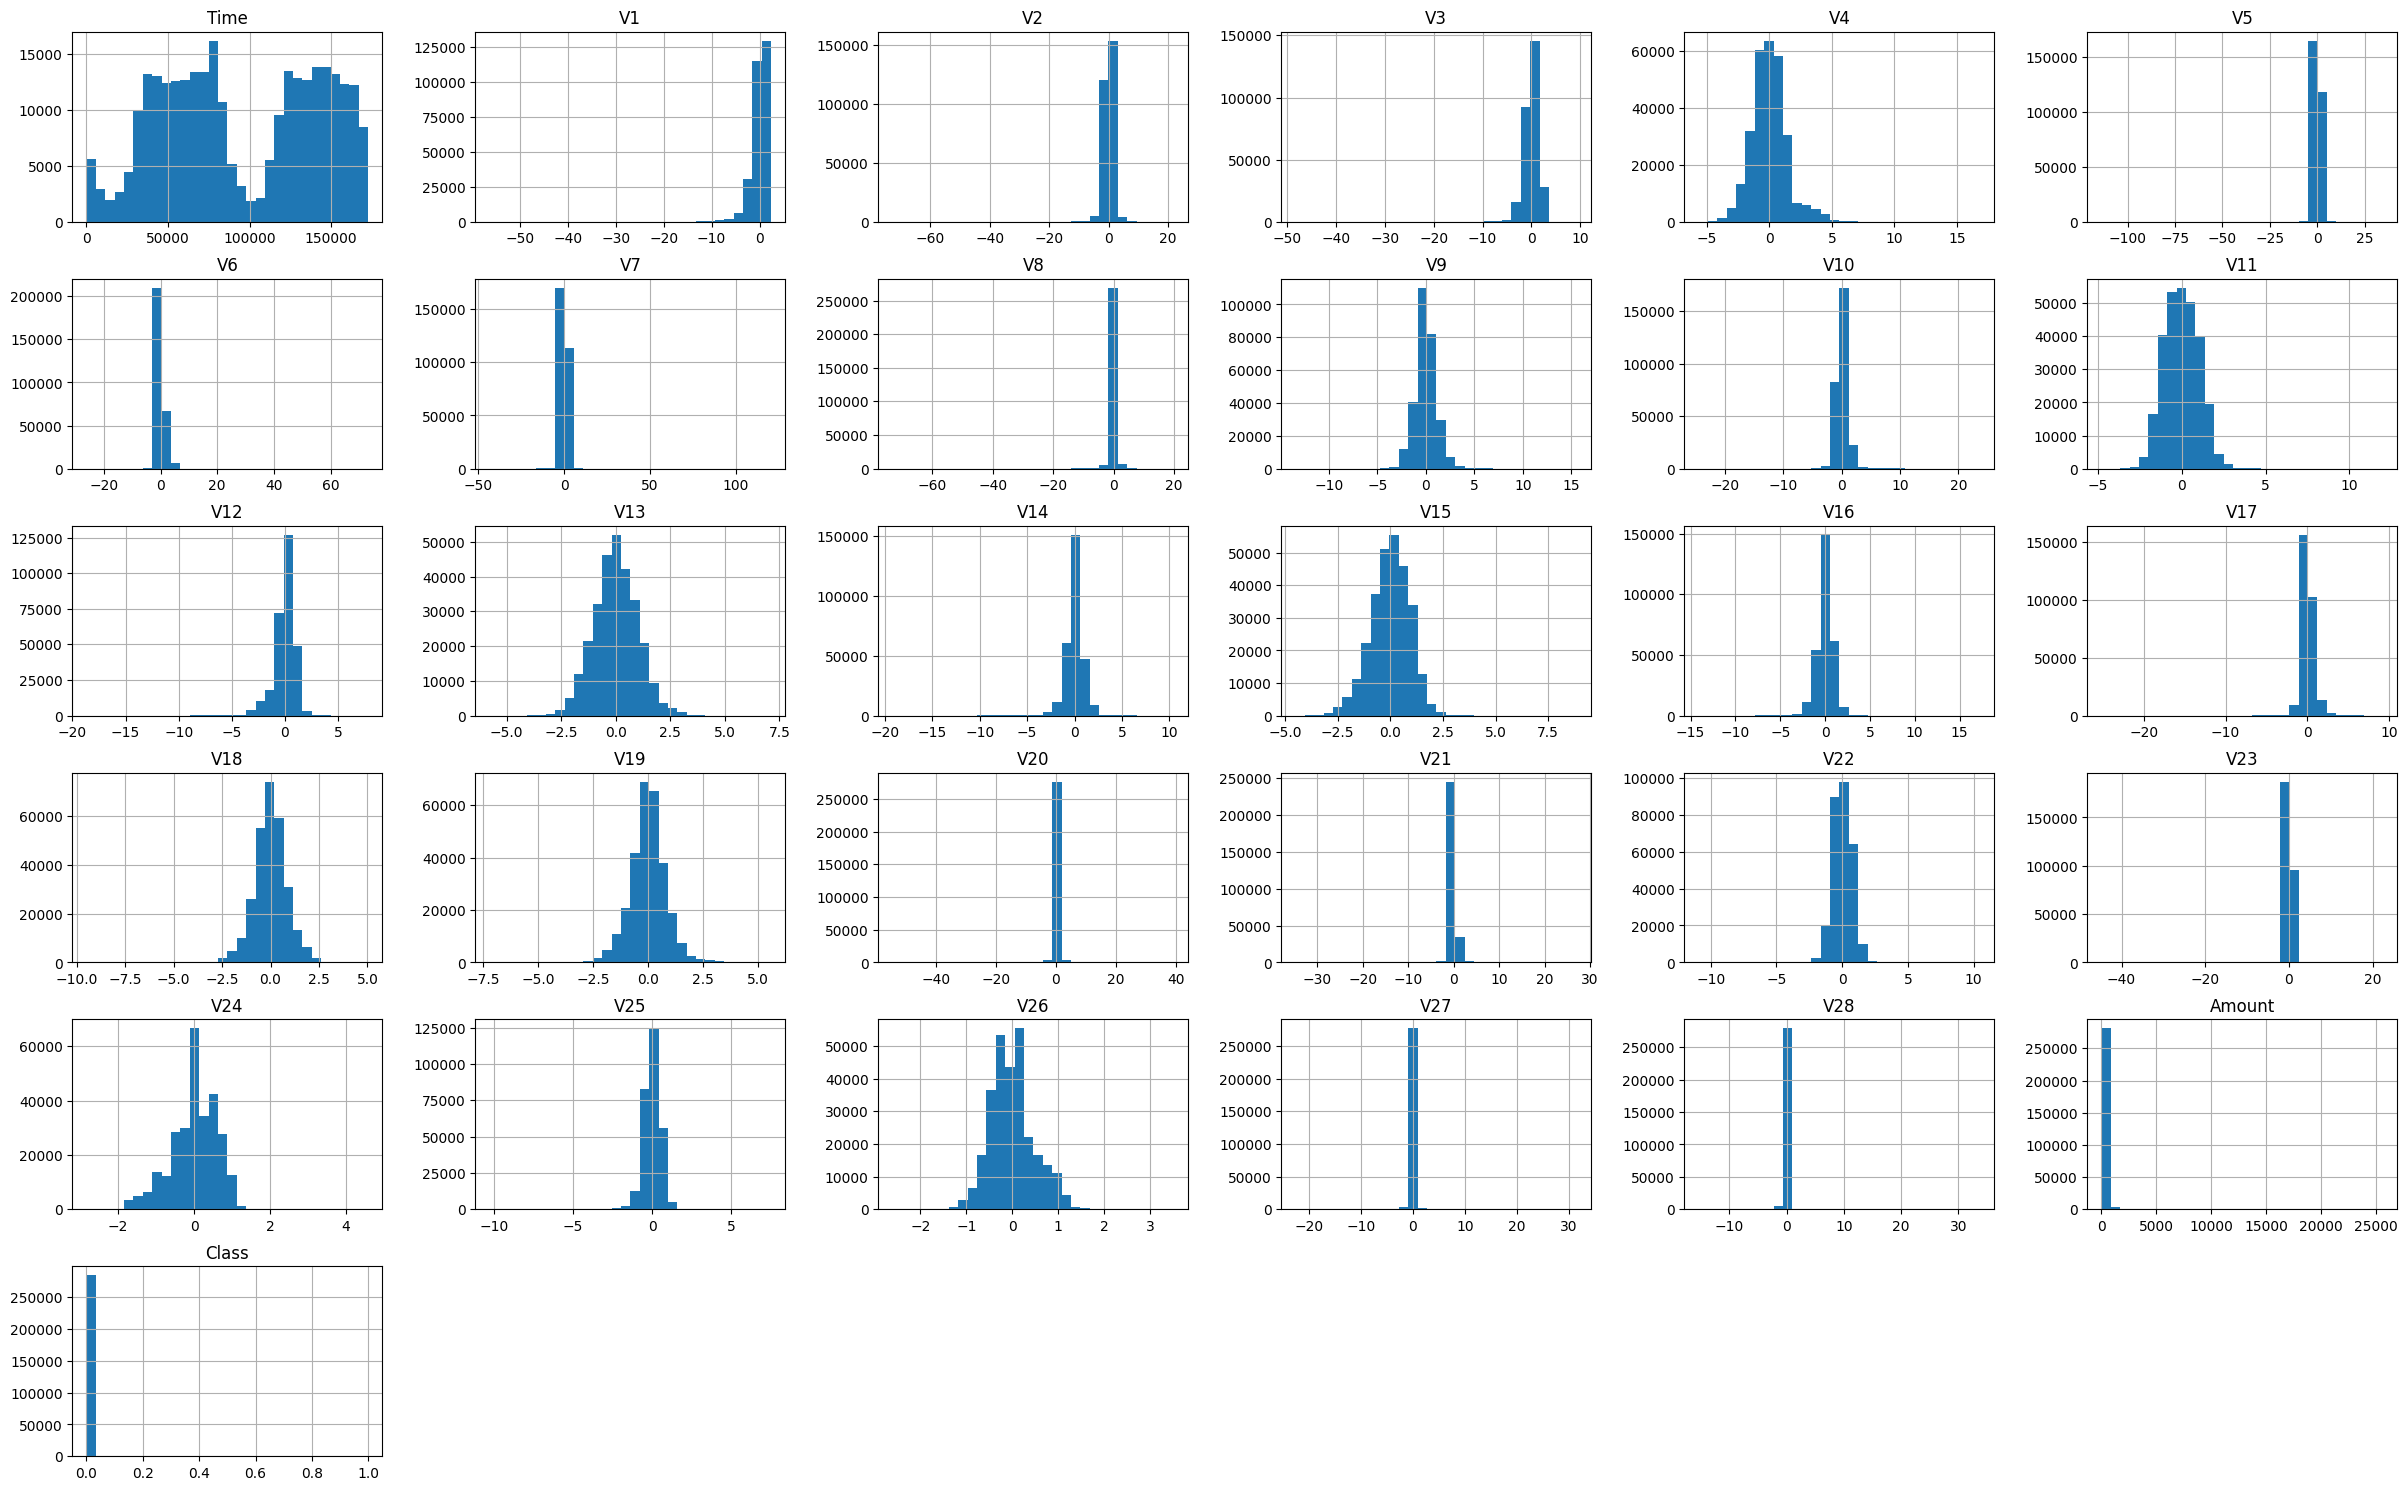

In [67]:
df.hist(bins=30, figsize=(30, 18.5))
plt.show()

find the toatal transaction, fraud transaction,and fraud tranaction percantage.

In [68]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudtransaction = len(df[df.Class == 1])
fraud_percentage = round(fraudtransaction/normal*100, 5)
print('Total number of Trnsactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent Transactions are {}'.format(fraudtransaction))
print('Percentage of fraud Transactions is {} %'.format(fraud_percentage))

Total number of Trnsactions are 284807
Number of Normal Transactions are 284315
Number of fraudulent Transactions are 492
Percentage of fraud Transactions is 0.17305 %


Correlation :-

In [69]:
corr_Class = df.corr()['Class']
print(corr_Class)

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


In [70]:
corr_Class = corr_Class[:-1].abs().sort_values(ascending = False)
corr_Class

V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

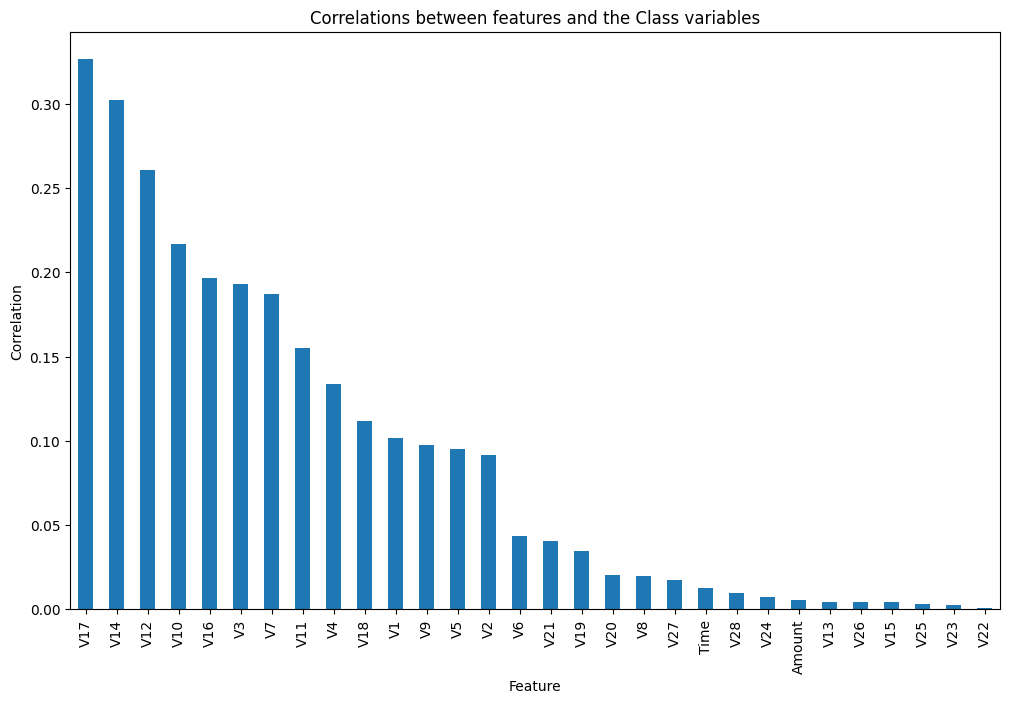

In [71]:
plt.figure(figsize=(12,7.5))
corr_Class.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlations between features and the Class variables')
plt.show()

------------------------------------------------------------------------------------------------

Models :-

Split data into train and test.

In [72]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [73]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [76]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X, y)
X_train, y_train = sm.fit_resample(X_train, y_train)


print(sum(y_train== 0))

print(sum(y_train== 1))

Before OverSampling, counts of label '1': 381
Before OverSampling, counts of label '0': 213224 

213224
213224


---------------------------------------------------------------------------------------------------------------------

K- Nearest Neighbour

In [77]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [78]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_pred = KNN.predict(X_test)

In [79]:
print('Accuracy is {}'.format(accuracy_score(y_test, knn_pred)))

Accuracy is 0.9381056711890116


In [80]:
print('F1 score is {}'.format(f1_score(y_test, knn_pred)))

F1 score is 0.02044898866414759


In [81]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, knn_pred)
cm  

array([[66749,  4342],
       [   65,    46]], dtype=int64)

<AxesSubplot: >

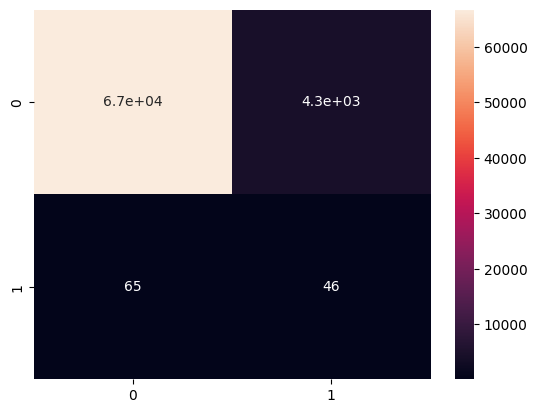

In [82]:
sns.heatmap(cm, annot=True)

--------------------------------------------------------------------------------------------------------------------

Random forest :-

In [83]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor

In [84]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [85]:
print('Accuracy is {}'.format(accuracy_score(y_test, rf_pred)))

Accuracy is 0.9961237043903262


In [86]:
print('F1 score is {}'.format(f1_score(y_test, rf_pred)))

F1 score is 0.39207048458149774


In [87]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, rf_pred)
cm  

array([[70837,   254],
       [   22,    89]], dtype=int64)

<AxesSubplot: >

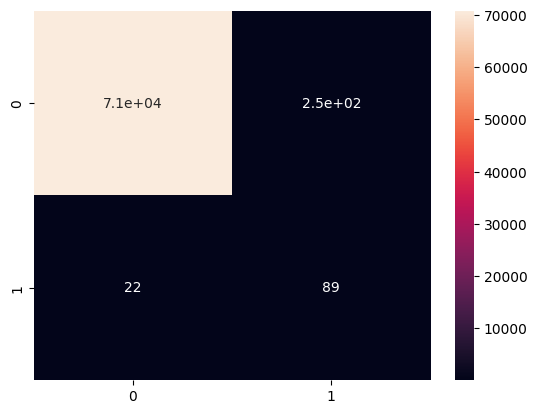

In [88]:
sns.heatmap(cm, annot=True)

----------------------------------------------------------------------------------------------------------------

Naive Bayes:-

In [89]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(X_train)  
x_test = sc.transform(X_test) 

In [90]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)

GaussianNB()

In [91]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [93]:
cm

array([[69543,  1548],
       [   22,    89]], dtype=int64)

In [94]:
print('Accuracy is {}'.format(classifier.score(X_test,y_test)))

Accuracy is 0.9982444313361984


In [95]:
print('F1 score is {}'.format(f1_score(y_test, y_pred)))

F1 score is 0.10183066361556063


<AxesSubplot: >

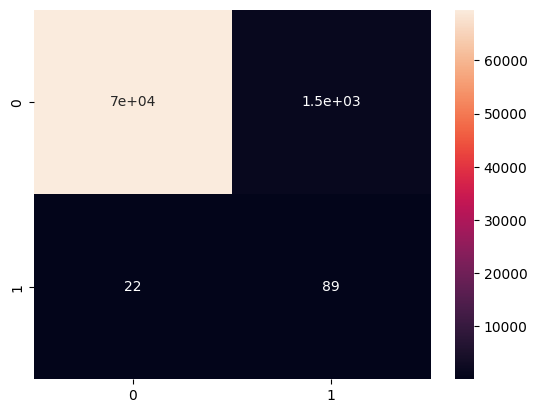

In [96]:
sns.heatmap(cm, annot=True)

---------------------------------------------------------------------------------------------------------------------

XGBoost Classifier :- 

In [97]:
from xgboost import XGBClassifier

In [98]:
xgb_clf = XGBClassifier(max_depth = 5, learning_rate = 0.08, objective = 'binary:logistic')

xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

In [ ]:
print('XG Boost Classifier:')
print('--------------------')
print('The accuracy score is: %.3f' % accuracy_score(y_test, y_pred_xgb))
print('The precision score is: %.3f' % precision_score(y_test, y_pred_xgb))
print('The recall score is: %.3f' % recall_score(y_test, y_pred_xgb))

XG Boost Classifier:
--------------------
The accuracy score is: 0.997
The precision score is: 0.343
The recall score is: 0.820


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

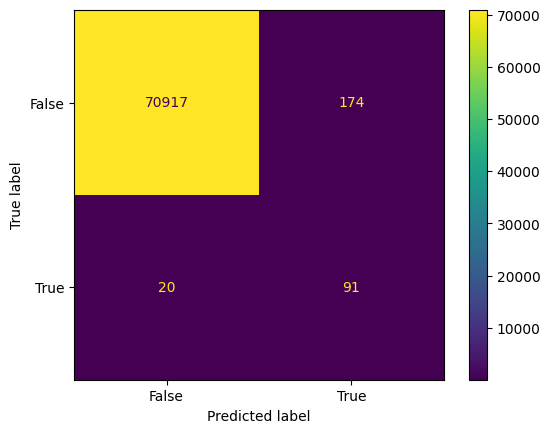

In [ ]:
#the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb_display = ConfusionMatrixDisplay(confusion_matrix = cm_xgb, display_labels = [False, True])
cm_xgb_display.plot()
plt.show()

---------------------------------------------------------------------------------------------------------------

SVM Model :-

In [ ]:
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR 

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC()  
classifier.fit(X_train, y_train)  

In [ ]:
y_pred = classifier.predict(x_test)  
y_pred

In [ ]:
print('Accuracy is {}'.format(classifier.score(X_test,y_test)))

In [ ]:
print('F1 score is {}'.format(f1_score(y_test, y_pred)))

In [ ]:
cm = confusion_matrix(y_test, y_pred)  
cm

In [ ]:
sns.heatmap(cm, annot=True)

-----------------------------------------------------------------------------------------------------

X------------------------------------------------- End Of Code --------------------------------------------------------X